# Chi-square distribution
1. for a standard normal R.V. Z, $Z^2$ follows a $\chi^2(1)$, i.e. a chi-squared distribution having 1 degree of freedom.
2. in general, **the definition** of this distribution is that $\chi^2(k)$ represents the PDF of a RV formed from summing k squared-RVs, where each RV is samples from $\mathcal{N}(0,1)$.

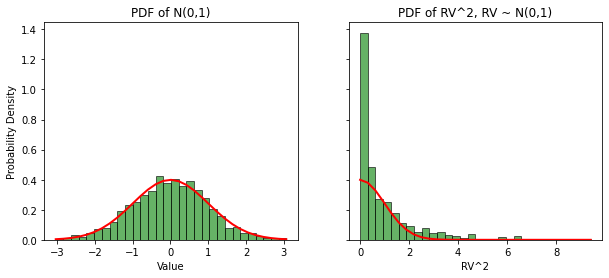

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

# Generate data
samples = np.random.normal(loc=0, scale=1, size=1000)

samples_sq = samples ** 2 # squared RV

# Create a histogram to estimate the PDF
count, bins, ignored = ax[0].hist(samples, 30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the PDF curve
ax[0].plot(bins, 1/(np.sqrt(2 * np.pi)) * np.exp( - bins**2 / 2 ), linewidth=2, color='r')

# Add labels and title
ax[0].set_title('PDF of N(0,1)')
ax[0].set_xlabel('Value')
ax[0].set_ylabel('Probability Density')

# Create a histogram to estimate the PDF
count_sq, bins_sq, ignored_sq = ax[1].hist(samples_sq, 30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the PDF curve
ax[1].plot(bins_sq, 1/(np.sqrt(2 * np.pi)) * np.exp( - bins_sq**2 / 2 ), linewidth=2, color='r')

# Add labels and title
ax[1].set_title('PDF of RV^2, RV ~ N(0,1)')
ax[1].set_xlabel('RV^2')

# Show plot
plt.show()

- Remember, this is a PDF, and not a PF.
- Area under the curve = 1.

The sum of squares of 2 RVs sampled from $\mathcal{N}(0,1)$ is $\chi^2(2)$, i.e. a chi-squared distribution with 2 degrees of freedom.

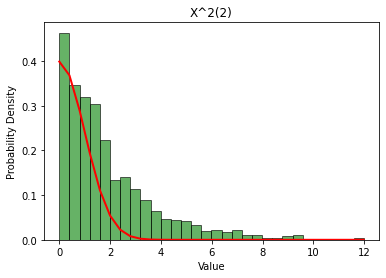

In [7]:
# Generate the 2nd RV
samples_2 = np.random.normal(loc=0, scale=1, size=1000)

sumof_2_sq_stdnorm = samples_sq + (samples_2 ** 2)

# Create a histogram to estimate the PDF
count, bins, ignored = plt.hist(sumof_2_sq_stdnorm, 30, density=True, alpha=0.6, color='g', edgecolor='black')

# Plot the PDF curve
plt.plot(bins, 1/(np.sqrt(2 * np.pi)) * np.exp( - bins**2 / 2 ), linewidth=2, color='r')

# Add labels and title
plt.title('X^2(2)')
plt.xlabel('Value')
plt.ylabel('Probability Density')

plt.show()

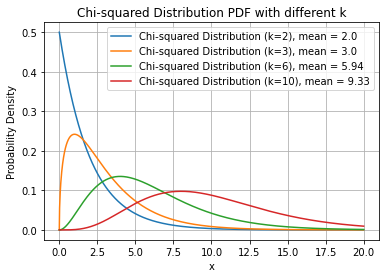

In [19]:
from scipy.stats import chi2
from scipy.integrate import simps

x = np.linspace(0, 20, 1000)
pdf_chi2_k2, pdf_chi2_k3, pdf_chi2_k6, pdf_chi2_k10 = chi2.pdf(x, 2), chi2.pdf(x, 3), chi2.pdf(x, 6), chi2.pdf(x, 10)

# Plot the PDF
plt.plot(x, pdf_chi2_k2, label=f'Chi-squared Distribution (k=2), mean = {round(simps(x * pdf_chi2_k2, x), 2)}')
plt.plot(x, pdf_chi2_k3, label=f'Chi-squared Distribution (k=3), mean = {round(simps(x * pdf_chi2_k3, x), 2)}')
plt.plot(x, pdf_chi2_k6, label=f'Chi-squared Distribution (k=6), mean = {round(simps(x * pdf_chi2_k6, x), 2)}')
plt.plot(x, pdf_chi2_k10, label=f'Chi-squared Distribution (k=10), mean = {round(simps(x * pdf_chi2_k10, x), 2)}')

plt.title(f'Chi-squared Distribution PDF with different k')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

1. For smaller degrees of freedom(k=1,2) the PDF peaks at 0.
2. As these go up, the peak shifts rightward.
3. For a $\chi^2(k)$ distribution the mean = k.
    1. for the samples, due to improper sample, the mean is almost k.

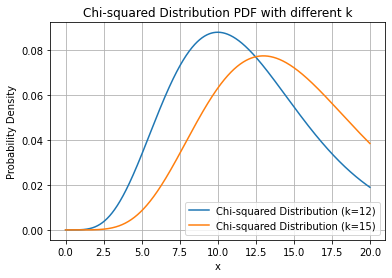

In [15]:
plt.plot(x, chi2.pdf(x, 12), label=f'Chi-squared Distribution (k=12)')
plt.plot(x, chi2.pdf(x, 15), label=f'Chi-squared Distribution (k=15)')

plt.title(f'Chi-squared Distribution PDF with different k')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

## Mathematical definition of $\chi^2(k)$
$\chi^2_k(x) = x^{k/2 - 1}e^{-x/2}\left(2^{k/2}\Gamma(k/2) \right)^{-1}$, this is the PDF at point x.
- $\Gamma(\alpha) = \int\limits_0^{\infty} x^{\alpha-1}e^{x} dx$ is known as the gamma function.

# F-statistic and F-distribution
1. given 2 chi-squared distributions with degrees of freedom $\nu$ and $k$, 
    $\begin{equation} F(x) = \dfrac{\chi^2(\nu)/\nu}{\chi^2(k)/k} \end{equation}$
2. in coding terminologies, $\nu = $ `df_num` (degrees of freedom in numerator), $k$ = `df_denom` (degrees of freedom in denominator).
3. mathematically: if random variables X, Y belong to $\chi^2(\nu) \,,\, \chi^2(k)$ respectively , then the random variable $F = \dfrac{(X/\nu)}{(Y/k)}$ follows an F-distribution. this RV is called the **F-statistic**.

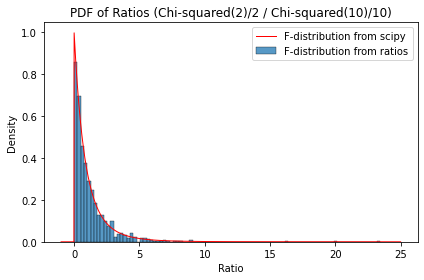

In [34]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import f

# Number of samples
n_samples = 1000

# Draw samples from chi-squared distributions
samples_chi2_2 = np.random.chisquare(df=2, size=n_samples)
samples_chi2_10 = np.random.chisquare(df=10, size=n_samples)

# Compute ratio of sample variances scaled by their degrees of freedom
ratios = (samples_chi2_2 / 2) / (samples_chi2_10 / 10)

# Plot KDE (PDF) of the ratios
sns.histplot(ratios, stat='density', label='F-distribution from ratios')

# compute F-distribution from scipy function
points = np.linspace(-1,25,2000)
plt.plot(points, f.pdf(points, 2, 10), c='r', label='F-distribution from scipy', linewidth=1)

plt.title('PDF of Ratios (Chi-squared(2)/2 / Chi-squared(10)/10)')
plt.xlabel('Ratio')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()


## Misconception-1: F-distribution is the ratio of the PDFs of 2 chi-squared distributions.

<ipython-input-27-b9e110f9c7f7>:16: RuntimeWarning: invalid value encountered in divide
  ax[1][int(idx/2)].plot(points, (chi2.pdf(points, df_num)*df_denom)/(chi2.pdf(points, df_denom)*df_num), label=f'chi_sq({df_num})/chi_sq({df_denom})')


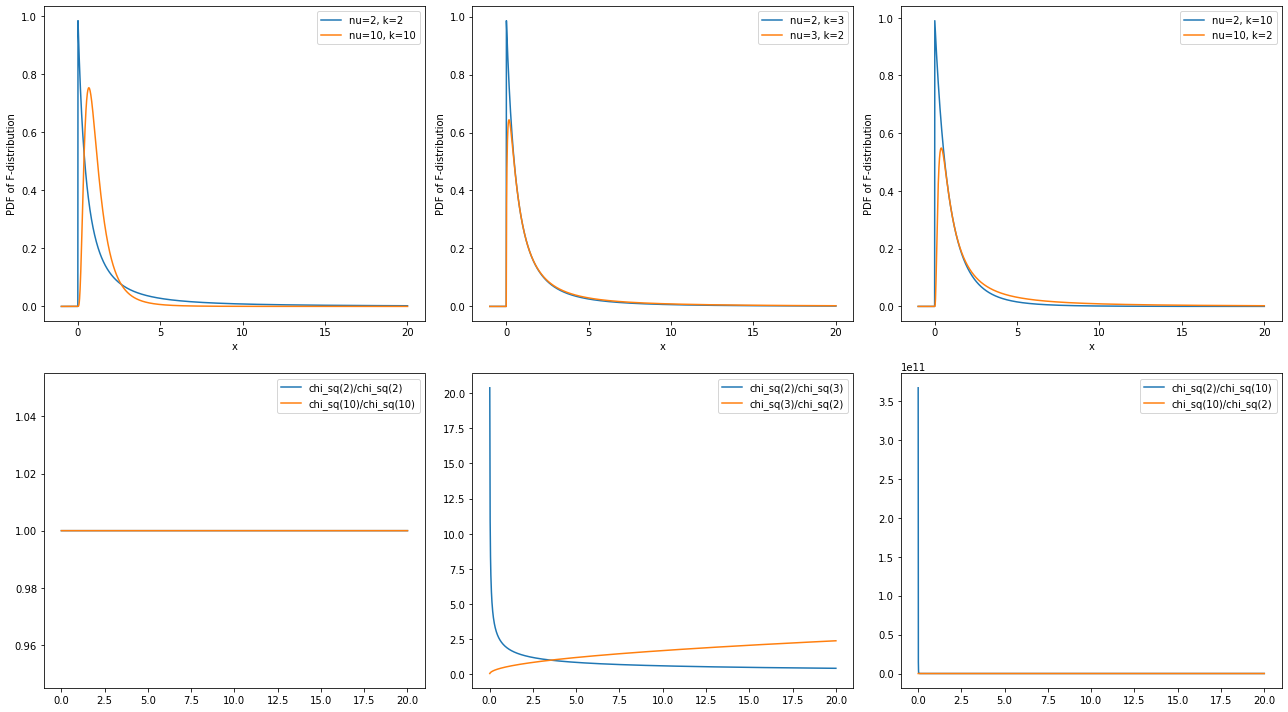

In [27]:
from scipy.stats import f

combinations = [[2,2],[10,10],[2,3],[3,2],[2,10],[10,2]]

points = np.linspace(-1,20,2000)

fig, ax = plt.subplots(2, 3, figsize=(18,10))

for idx, combo in enumerate(combinations):
    df_num, df_denom = combo
    ax[0][int(idx/2)].plot(points, f.pdf(points, df_num, df_denom), label=f'nu={df_num}, k={df_denom}')
    ax[0][int(idx/2)].set_xlabel('x')
    ax[0][int(idx/2)].set_ylabel('PDF of F-distribution')
    ax[0][int(idx/2)].legend()

    ax[1][int(idx/2)].plot(points, (chi2.pdf(points, df_num)*df_denom)/(chi2.pdf(points, df_denom)*df_num), label=f'chi_sq({df_num})/chi_sq({df_denom})')
    ax[1][int(idx/2)].legend()


plt.tight_layout()
plt.show()

# Context of Normally distributed Error terms
1. for a feature set $x_1,x_2,x_3...x_p$, in **linear regression**(ordinary least squares), $y = \underbrace{\beta_0 + \beta_1x_1+ \beta_2 x_2...+ \beta_px_p}_{\hat{y} = OLS} + \epsilon$, where $\beta_0$ is the bias term, $\beta_i$ is the weight for $i^{th}$ feature, **and $\epsilon$ is the error term, i.e. the residual term after a linear regressor** is assumed.
2. in hypothesis testing, the most common null hypothesis to be tested is: H0: $\beta_i, i > 0 = 0$, i.e. $\hat{y} = \beta_0$
3. hence the sum of squared **residuals**, i.e. $SSR = \sum\limits_{i=1}^n (y_i - \hat{y}_i)^2 = \sum\limits_{i=1}^n (\beta_0 + \epsilon_i - \beta_0)^2 = \sum\limits_{i=1}^n \epsilon_i^2 $
4. thus it forms a $\chi^2_n$ (n: number of total features).

## Degrees of Freedom in Linear Regression
1. Total Degrees of Freedom (n): The total degrees of freedom in linear regression are indeed equal to the number of observations (n).
    1. Each observation contributes one degree of freedom because it represents one independent piece of information about the data. 
    2. In other words, before any model is fitted, you have n data points, each contributing to one degree of freedom.
2. on assuming the null hypothesis H0: $\beta_i = 0 \,\, \forall \,\, i \,\, \epsilon \, [1,p] \, , \, Z^+$, we have already restricted p-degrees of freedom, hence the left = $n-p$.

**the sum** of n i.i.d.(independent and identically distributed) normal variables follows a **chi-square** distribution.